## Importing Libraries: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

## Dataset Information:

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()
#687 values missing in Cabin,177 values missing in age and 2 in embarked,so imputing is needed.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory Data Analysis (EDA) :

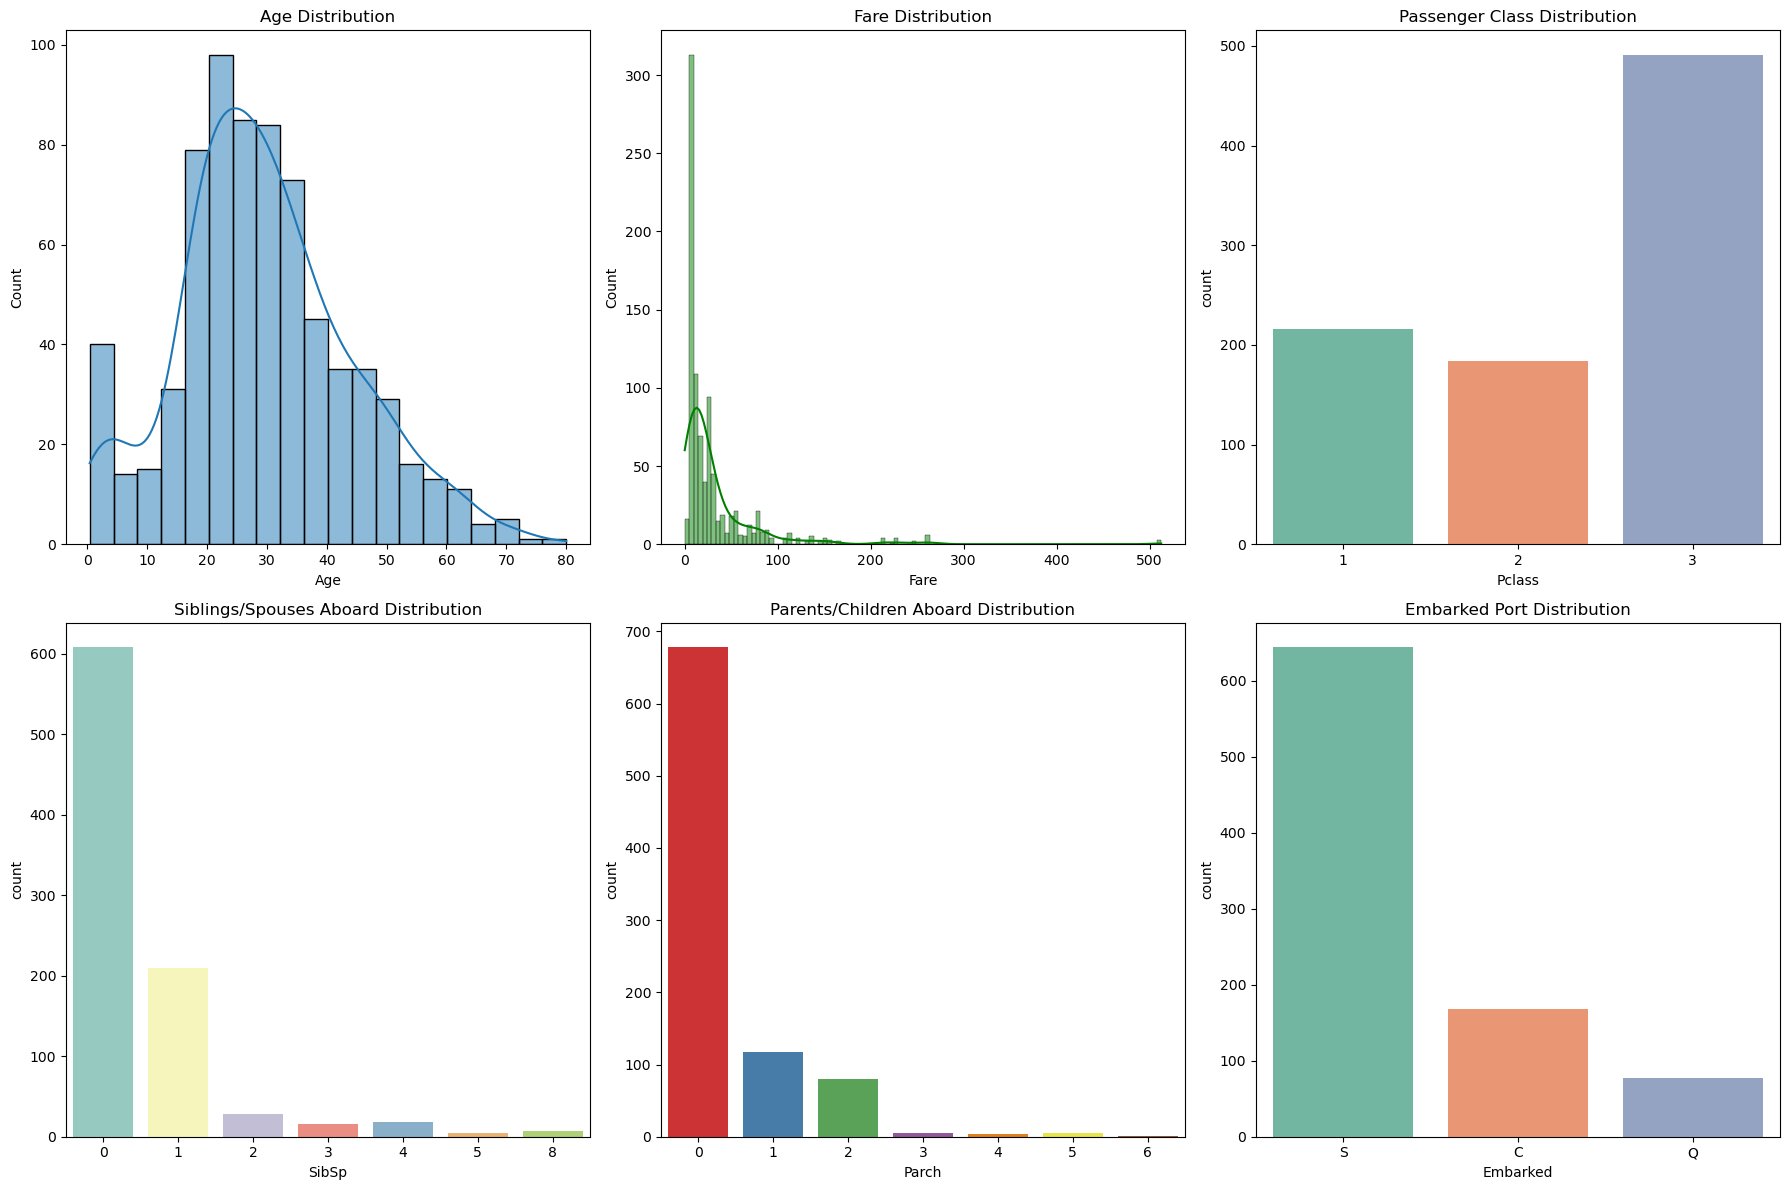

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Age distribution
sns.histplot(df['Age'].dropna(), kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# Fare distribution
sns.histplot(df['Fare'], kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Fare Distribution')

# Pclass distribution
sns.countplot(x='Pclass', data=df, ax=axs[0, 2], palette='Set2')
axs[0, 2].set_title('Passenger Class Distribution')

# SibSp distribution
sns.countplot(x='SibSp', data=df, ax=axs[1, 0], palette='Set3')
axs[1, 0].set_title('Siblings/Spouses Aboard Distribution')

# Parch distribution
sns.countplot(x='Parch', data=df, ax=axs[1, 1], palette='Set1')
axs[1, 1].set_title('Parents/Children Aboard Distribution')

# Embarked distribution
sns.countplot(x='Embarked', data=df, ax=axs[1, 2], palette='Set2')
axs[1, 2].set_title('Embarked Port Distribution')

plt.tight_layout()
plt.show()

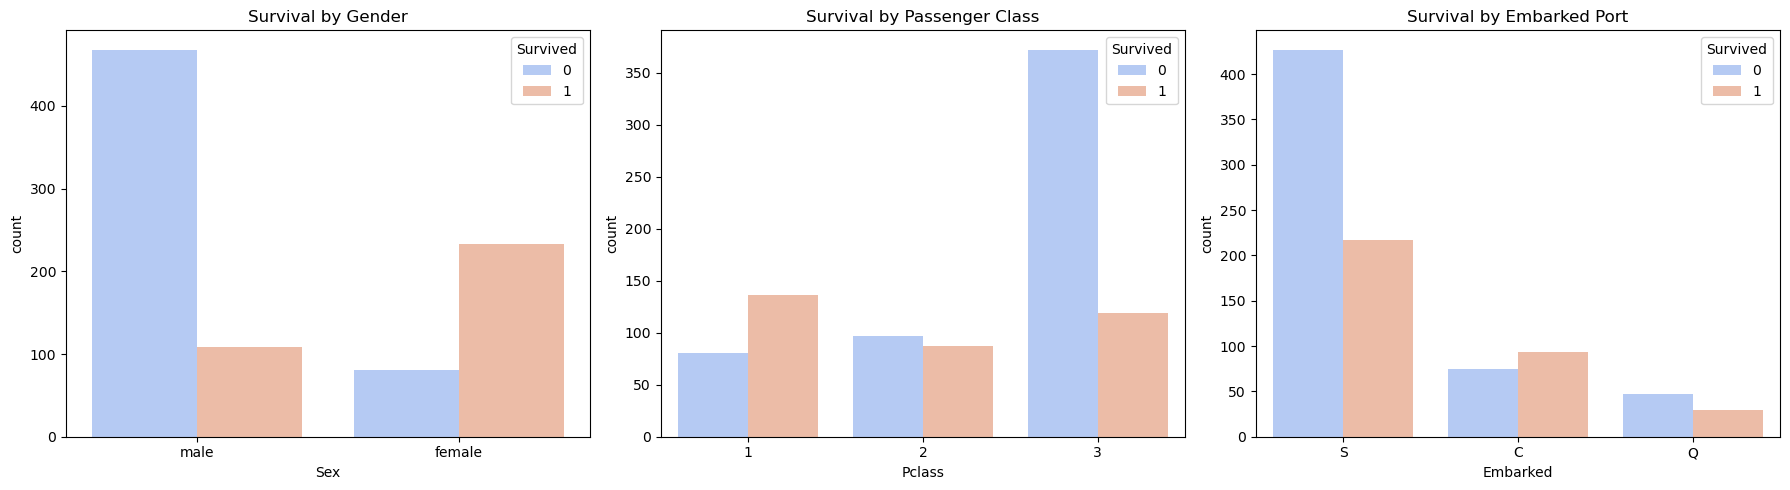

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, ax=axs[0], palette='coolwarm')
axs[0].set_title('Survival by Gender')

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axs[1], palette='coolwarm')
axs[1].set_title('Survival by Passenger Class')

# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axs[2], palette='coolwarm')
axs[2].set_title('Survival by Embarked Port')

plt.tight_layout()
plt.show()

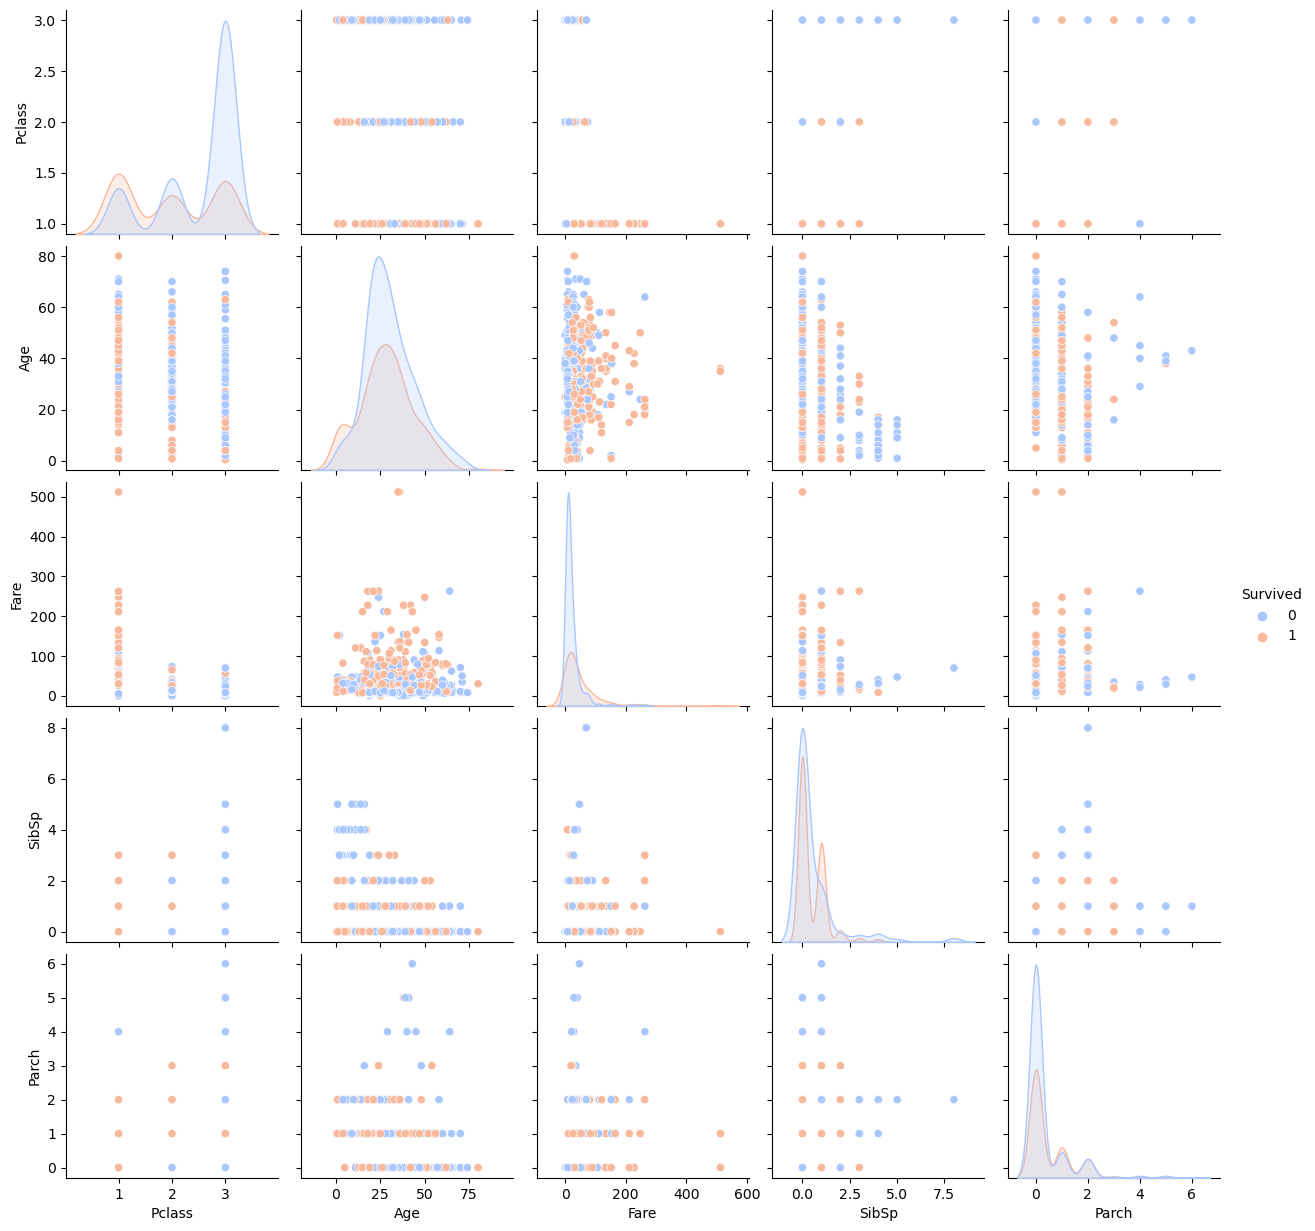

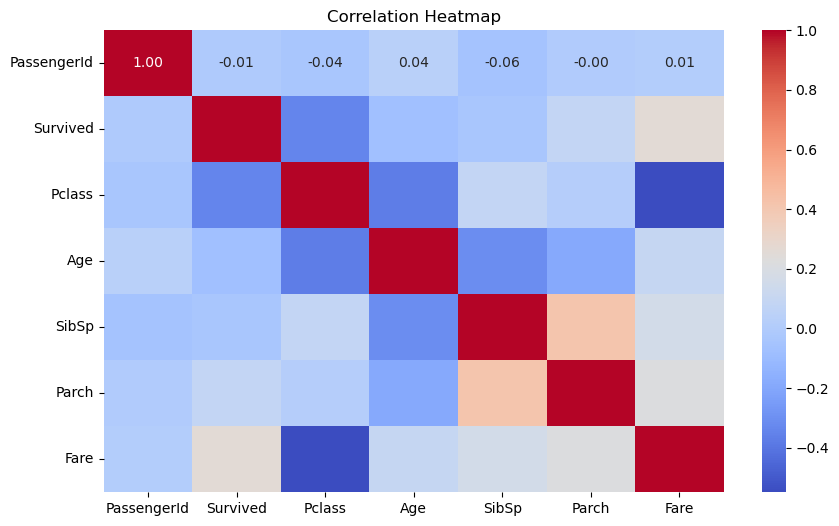

In [9]:
# Pair plot for numerical features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived', palette='coolwarm')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

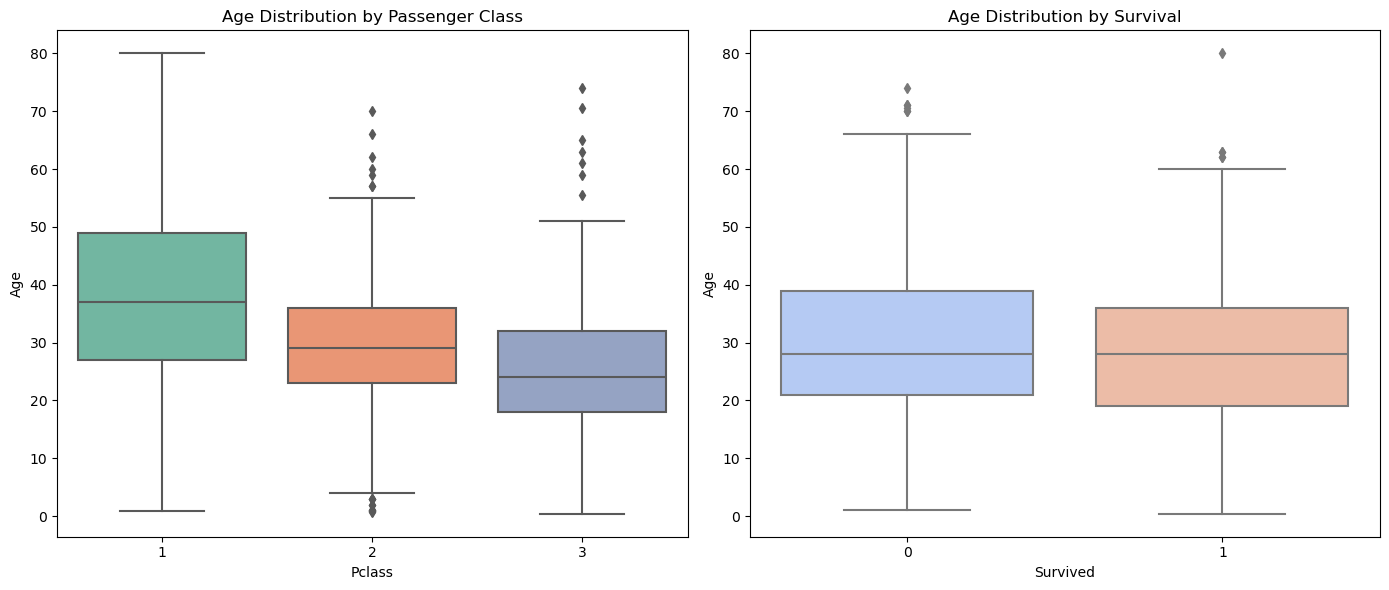

In [10]:
# Box Plot for detecting Outliers:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Age distribution by Pclass
sns.boxplot(x='Pclass', y='Age', data=df, ax=axs[0], palette='Set2')
axs[0].set_title('Age Distribution by Passenger Class')

# Age distribution by Survival
sns.boxplot(x='Survived', y='Age', data=df, ax=axs[1], palette='coolwarm')
axs[1].set_title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

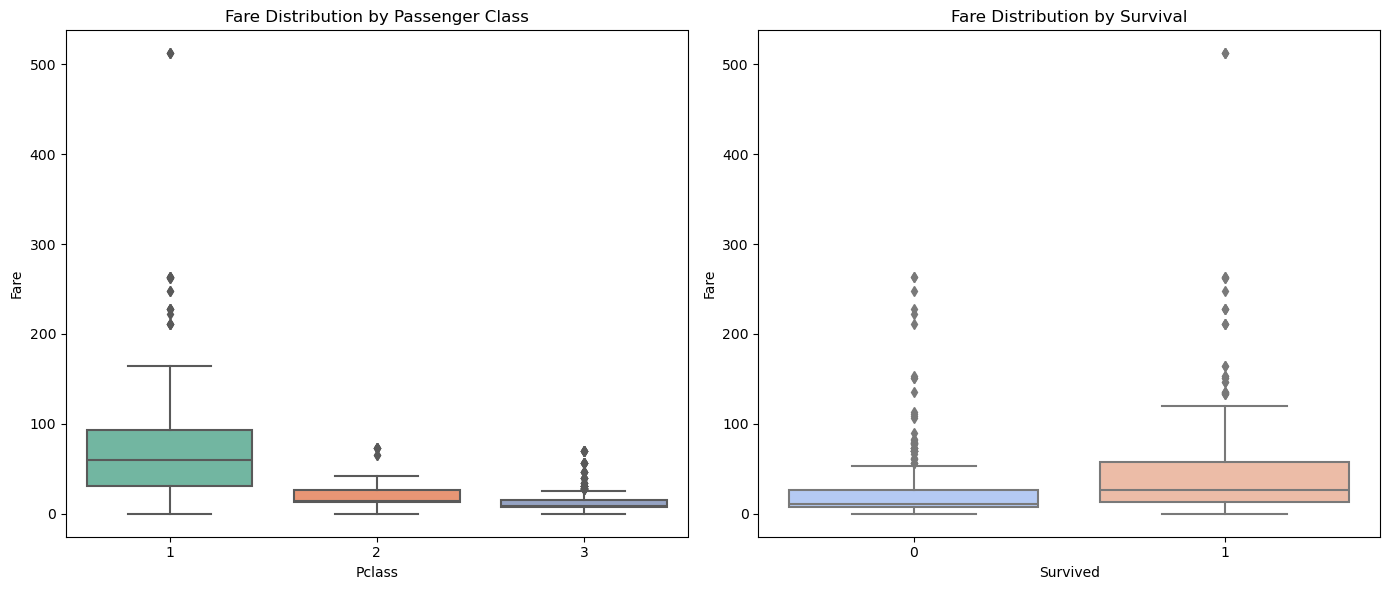

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Fare distribution by Pclass
sns.boxplot(x='Pclass', y='Fare', data=df, ax=axs[0], palette='Set2')
axs[0].set_title('Fare Distribution by Passenger Class')

# Fare distribution by Survival
sns.boxplot(x='Survived', y='Fare', data=df, ax=axs[1], palette='coolwarm')
axs[1].set_title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

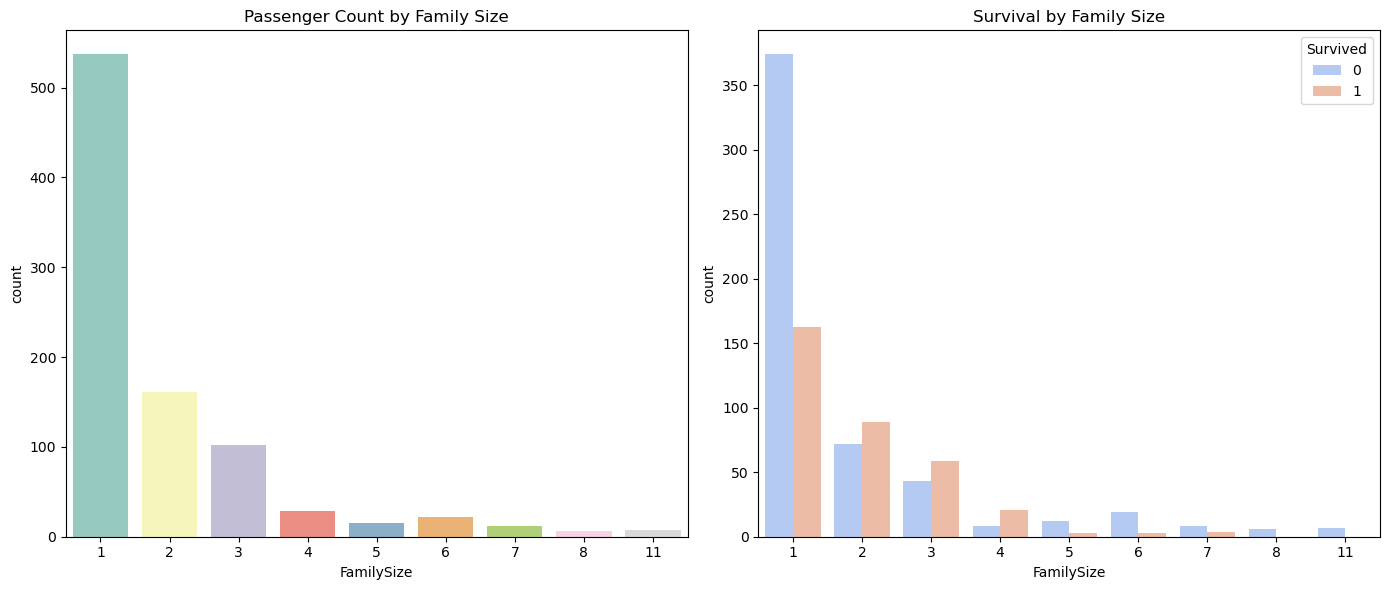

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Countplot of FamilySize
sns.countplot(x='FamilySize', data=df, ax=axs[0], palette='Set3')
axs[0].set_title('Passenger Count by Family Size')

# Countplot of FamilySize vs Survival
sns.countplot(x='FamilySize', hue='Survived', data=df, ax=axs[1], palette='coolwarm')
axs[1].set_title('Survival by Family Size')

plt.tight_layout()
plt.show()

## Data Preprocessing:

In [13]:
# Dropping unnecessary columns:

df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [14]:
# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill Embarked missing values with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
# Label Encoding for 'Sex' and 'Embarked'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [16]:
# Scaling features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

### Outlier handling using z-score:

In [17]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['Age', 'Fare']])) < 3).all(axis=1)]

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,-0.592481,1,0,-0.502445,2,2
1,1,1,0,0.638789,1,0,0.786845,0,2
2,1,3,0,-0.284663,0,0,-0.488854,2,1
3,1,1,0,0.407926,1,0,0.420730,2,2
4,0,3,1,0.407926,0,0,-0.486337,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,0,0,-0.386671,2,1
887,1,1,0,-0.823344,0,0,-0.044381,2,1
888,0,3,0,0.000000,1,2,-0.176263,2,4
889,1,1,1,-0.284663,0,0,-0.044381,0,1


## Splitting the dataset:

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prediction Using Various Classification Algorithms:

### Logistic Regression:

In [20]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log),'\n','-'*60)
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7283236994219653 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.69      0.64      0.67        73

    accuracy                           0.73       173
   macro avg       0.72      0.72      0.72       173
weighted avg       0.73      0.73      0.73       173



### Random Forest:

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf),'\n','-'*60)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7745664739884393 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.74      0.73      0.73        73

    accuracy                           0.77       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.77      0.77      0.77       173



### K-Nearest Neighbors (KNN):

In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn),'\n','-'*60)
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7630057803468208 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.78      0.62      0.69        73

    accuracy                           0.76       173
   macro avg       0.77      0.74      0.75       173
weighted avg       0.76      0.76      0.76       173



### Support Vector Classifier (SVC) :

In [23]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluation
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc),'\n','-'*60)
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.7687861271676301 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.75      0.67      0.71        73

    accuracy                           0.77       173
   macro avg       0.77      0.76      0.76       173
weighted avg       0.77      0.77      0.77       173



## Hyper-Parameter Tuning: 

In [24]:
# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy Score: 0.8320717339172141


## Cross-Validation:

In [25]:
# Cross-validation for Random Forest
rf_cv = RandomForestClassifier(**grid_search.best_params_)
cv_scores = cross_val_score(rf_cv, X_train, y_train, cv=5)

print("Random Forest Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Random Forest Cross-Validation Scores: [0.8705036  0.85507246 0.79710145 0.79710145 0.80434783]
Mean Cross-Validation Score: 0.82482535710562


## Final Model :

In [26]:
# Refitting Random Forest with best parameters and evaluate
rf_cv.fit(X_train, y_train)
y_pred_final = rf_cv.predict(X_test)

# Final Evaluation
print("Final Random Forest Accuracy:", accuracy_score(y_test, y_pred_final),'\n','-'*60)
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

Final Random Forest Accuracy: 0.7976878612716763 
 ------------------------------------------------------------
[[90 10]
 [25 48]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.83      0.66      0.73        73

    accuracy                           0.80       173
   macro avg       0.81      0.78      0.79       173
weighted avg       0.80      0.80      0.79       173



## Save the model:

In [29]:
from joblib import dump

dump(rf_cv, 'titanic_model.joblib')

['titanic_model.joblib']